## Credit Card Default Prediction

### Introduction About the Data :

**The dataset** The goal is to predict `probability of default ` of given credit card dataset.



* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for   nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

* target.payment.next.month: Default payment (1=yes, 0=no)


In [26]:
import pandas as pd

from datetime import datetime
import time
import sys
import src.utils
from src.utils import *
from src.utils1 import *
import logging
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support,
                            ConfusionMatrixDisplay)
import warnings
warnings.filterwarnings('ignore')


In [2]:
## Data Ingestions step
df=pd.read_csv('data/UCI_Credit_Card.csv')


In [3]:
## Lets drop the id column
df=df.drop(labels=['ID'],axis=1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df_cd_filtered=var_filter(df,'target')

[INFO] filtering variables ...
Variable filtering on 30000 rows and 24 columns in 00:00:59 
2 variables are removed


In [5]:
bins =woebin(df_cd_filtered, y="target")

[INFO] creating woe binning ...


In [6]:
breaks_adj = {
    'AGE': [25, 30, 35,40,45 ],
    'BILL_AMT1':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT2':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT3':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT4':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT5':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT6':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'PAY_0':[-2,-1,0,1,2],
    'PAY_2':[-2,-1,0,1,2],
    'PAY_3':[-2,-1,0,1,2],
    
    'PAY_4':[-2,-1,0,1,2],
    'PAY_5':[-2,-1,0,1,2],
    'PAY_6':[-2,-1,0,1,2,3,4,5,6,7,8]
}
bins_adj = woebin(df_cd_filtered, y="target", breaks_list=breaks_adj)

[INFO] creating woe binning ...


## Converting the dependent variables with woe original bins 

In [7]:
df_cd_woe = woebin_ply(df_cd_filtered, bins)

[INFO] converting into woe values ...


In [8]:
df_cd_woe.head(1)

,target,PAY_6_woe,BILL_AMT6_woe,BILL_AMT4_woe,PAY_AMT6_woe,BILL_AMT5_woe,PAY_AMT1_woe,PAY_4_woe,PAY_AMT4_woe,BILL_AMT2_woe,...,PAY_AMT3_woe,LIMIT_BAL_woe,PAY_AMT2_woe,PAY_AMT5_woe,BILL_AMT3_woe,PAY_5_woe,EDUCATION_woe,AGE_woe,PAY_0_woe,PAY_3_woe
0,1,-0.125056,-0.054628,-0.010213,0.273671,-0.038327,0.552881,-0.277851,0.332804,0.001506,...,0.411208,0.676765,0.072079,0.300488,-0.023295,-0.147246,0.091416,0.246734,2.084775,-0.33087


## Converting the dependent variables with adjusted woe  bins 

In [9]:
df_cd_woe_adj = woebin_ply(df_cd_filtered, bins_adj)

[INFO] converting into woe values ...


In [10]:
df_cd_woe_adj.head(1)

,target,PAY_6_woe,BILL_AMT6_woe,BILL_AMT4_woe,PAY_AMT6_woe,BILL_AMT5_woe,PAY_AMT1_woe,PAY_4_woe,PAY_AMT4_woe,BILL_AMT2_woe,...,PAY_AMT3_woe,LIMIT_BAL_woe,PAY_AMT2_woe,PAY_AMT5_woe,BILL_AMT3_woe,PAY_5_woe,EDUCATION_woe,AGE_woe,PAY_0_woe,PAY_3_woe
0,1,-0.125017,0.05689,0.06934,0.273671,0.100303,0.552881,-0.407307,0.332804,-0.170958,...,0.411208,0.676765,0.072079,0.300488,-0.211762,-0.147246,0.091416,0.273586,2.084775,-0.430029


In [11]:
## Split data for woe initial bin ##

x_train_woe, x_test_woe, y_train_woe, y_test_woe =split_data(df_cd_woe,'target',0.3)

shape of training set X: (21000, 21)
shape of training set y: (21000, 1)
ratio of label class of trainning: target
0         0.779238
1         0.220762
dtype: float64
shape of testing set  x: (9000, 21)
shape of testing set  y: (9000, 1)
ratio of label class of test: target
0         0.777778
1         0.222222
dtype: float64


In [12]:
## Split data for woe  bin adj ##

x_train_woeadj, x_test_woeadj, y_train_woeadj, y_test_woeadj =split_data(df_cd_woe_adj,'target',0.3)

shape of training set X: (21000, 21)
shape of training set y: (21000, 1)
ratio of label class of trainning: target
0         0.779238
1         0.220762
dtype: float64
shape of testing set  x: (9000, 21)
shape of testing set  y: (9000, 1)
ratio of label class of test: target
0         0.777778
1         0.222222
dtype: float64


In [13]:
# Split the data without WOE

x_train, x_test, y_train, y_test=split_data(df_cd_filtered,'target',0.3)

shape of training set X: (21000, 21)
shape of training set y: (21000, 1)
ratio of label class of trainning: target
0         0.779238
1         0.220762
dtype: float64
shape of testing set  x: (9000, 21)
shape of testing set  y: (9000, 1)
ratio of label class of test: target
0         0.777778
1         0.222222
dtype: float64



* S1: I have applied the woe created from the initial bins 
* S2: This sample is created with the adjusted woe 
* S3: This sample is created from the original dataset I,e data without imputing woe values 

* All S1,S2 and S3 are splitted in to test and train  


In [14]:
classifiers=['Logistic Regression',
             'KNN',
             'Decision Tree', 
             'Random forest',
             #'Linear Svm',
            'Ada Boost'
            #'xgboost'
            ]

models=[LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),
        DecisionTreeClassifier(), 
        RandomForestClassifier(n_estimators=100,random_state=0),
        #svm.SVC(kernel='linear'),
        AdaBoostClassifier(random_state=90)
        #XGBClassifier(n_estimators=100, n_jobs=6, verbose=1)
       ]

In [15]:
## S1 ##
compare_classification_model(x_train_woe,y_train_woe,x_test_woe,y_test_woe,classifiers,models)

,index,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_Fscore,Test_Fscore,Train_AUC,Test_AUC
0,Logistic Regression,0.819333,0.817333,0.671977,0.677645,0.354832,0.3395,0.464427,0.452365,0.652880,0.646679
1,KNN,0.857429,0.780000,0.728563,0.506676,0.564495,0.3795,0.636121,0.433962,0.752457,0.636964
2,Decision Tree,0.967190,0.733444,0.986683,0.395931,0.863028,0.3795,0.920723,0.387541,0.929864,0.607036
3,Random forest,0.967190,0.801889,0.974970,0.588140,0.873814,0.3620,0.921624,0.448158,0.933729,0.644786
4,Ada Boost,0.818714,0.817111,0.683814,0.687898,0.332614,0.3240,0.447540,0.440517,0.644522,0.641000


In [16]:
### S2 ###
compare_classification_model(x_train_woeadj,y_train_woeadj,x_test_woeadj,y_test_woeadj,classifiers,models)

,index,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_Fscore,Test_Fscore,Train_AUC,Test_AUC
0,Logistic Regression,0.819476,0.817444,0.672379,0.676558,0.355479,0.3420,0.465077,0.454334,0.653204,0.647643
1,KNN,0.862810,0.780444,0.748795,0.508141,0.569672,0.3745,0.647066,0.431203,0.757764,0.635464
2,Decision Tree,0.980571,0.727333,0.984862,0.388725,0.926230,0.3965,0.954647,0.392574,0.961098,0.609179
3,Random forest,0.980524,0.798778,0.975478,0.577143,0.935289,0.3535,0.954961,0.438450,0.964314,0.639750
4,Ada Boost,0.819952,0.817000,0.688077,0.683281,0.337360,0.3290,0.452743,0.444144,0.647016,0.642714


In [17]:
## S3 #
compare_classification_model(x_train,y_train,x_test,y_test,classifiers,models)

,index,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_Fscore,Test_Fscore,Train_AUC,Test_AUC
0,Logistic Regression,0.779190,0.777778,0.333333,0.000000,0.000216,0.0000,0.000431,0.000000,0.500047,0.500000
1,KNN,0.847048,0.737333,0.734057,0.354864,0.481665,0.2225,0.581662,0.273510,0.716114,0.553464
2,Decision Tree,0.998619,0.718778,0.999566,0.377026,0.994176,0.4070,0.996864,0.391440,0.997027,0.607429
3,Random forest,0.998619,0.814444,0.996765,0.645760,0.996980,0.3655,0.996873,0.466794,0.998032,0.654107
4,Ada Boost,0.819762,0.813667,0.694737,0.677668,0.327437,0.3080,0.445096,0.423513,0.643339,0.633071


In [18]:
### Conclution

### Conclution

For Sample1 or S1:
•	Logistic Regression is giving accuracy of 0.819667 in train and 0.817222 in test, so it is clear that model is not over/under fit. Precision score is 0.672491 and 0.675222 for train and test respectively. It means ~67% class are actually positive out of all correctly  predicted class( TP,TN). Recall score are 0.356989 and 0.3420 respectively. It means out of all ~35% positive class are truly predicted out of all positive class 


•	Decision Tree and Random Forest  is giving better accuracy than logistic regression but test accuracy is not matching with test accuracy. So there has a overfitting issue, Precision and recall score also speak the same.

•	KNN is giving me better accuracy then logistic regression 0.857429, but test set is  0.777111. though it also has overfitting issue but minimal than Decision Tree and Random Forest. Precision score is 0.777111 but this not incorporate with the test data, score achieved 0.498031. Recall score for test 0.3795 achieved with respective to 0.563632 achieved in train.


•	Ada Boost accuracy is 0.819143 achieved in train set and 0.814333 in test. Clearly model is not over fit. Precision score is 0.684095 and 0.674814 for train and test respectively. Recall score is 0.335850, 0.3175 for train and test. 

Noe out of the all algorithm Logistic Regression and Ada Boost has more robust result then then others . 

For Sample2 or S2:
lt achieved from S2. So this is clear binning adjustment is not adding up any special value 




S3 is the original dataset or data value not altered by woe bins. Logistic regression is giving very poor accuracy with 0.779143 and 0.777778 for train and test dataset. Precision and recall value is 0.000 so its means all class are predicted as negative . This module is not considered as an effective algorithm.
Ada Boost is giving is constant result as S! or S2 with  respect to accuracy and Precision and recall score.
So I am choosing Logistic regression and Ada Boost for the next phase of modeling

 



In [19]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train_woe,x_train_woe)
result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.556047
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.053    
Dependent Variable: target           AIC:              23395.9773
Date:               2023-05-24 02:38 BIC:              23562.9752
No. Observations:   21000            Log-Likelihood:   -11677.   
Df Model:           20               LL-Null:          -11085.   
Df Residuals:       20979            LLR p-value:      1.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
PAY_6_woe          0.3197   0.0487  6.5638 0.0000  0.2242  0.4152
BILL_AMT6_woe      0.2782   0.2418  1.1506 0.2499 -0.1957  0.7520


In [20]:
lr = LogisticRegression()
lr.fit(x_train_woe, y_train_woe)

LogisticRegression()

In [21]:
# make preditions on our test set
y_hat_test = lr.predict(x_test_woe)
# get the predicted probabilities
y_hat_test_proba = lr.predict_proba(x_test_woe)
# select the probabilities of only the positive class (class 1 - default) 
y_hat_test_proba = y_hat_test_proba[:][: , 1]
# we will now create a new DF with actual classes and the predicted probabilities
# create a temp y_test DF to reset its index to allow proper concaternation with y_hat_test_proba
y_test_temp = y_test_woe.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# check the shape to make sure the number of rows is same as that in y_test
y_test_proba.shape

# Rename the columns
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba']
# Makes the index of one dataframe equal to the index of another dataframe.
y_test_proba.index = x_test_woe.index
y_test_proba.head()

,y_test_class_actual,y_hat_test_proba
10747,0,0.102482
12573,1,0.383740
29676,0,0.110309
8856,1,0.825527
21098,0,0.318772


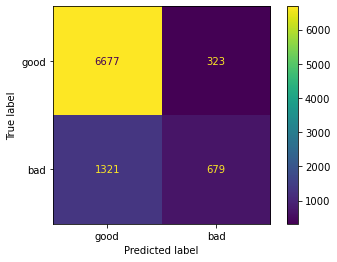

In [24]:
# assign a threshold value to differentiate (base = 50% prob)
tr = 0.5
# crate a new column for the predicted class based on predicted probabilities and threshold
# We will determine this optimal threshold later in this project
y_test_proba['y_test_class_predicted'] = np.where(y_test_proba['y_hat_test_proba'] > tr, 1, 0)
# create the confusion matrix
cm=confusion_matrix(y_test_proba['y_test_class_actual'],
                 y_test_proba['y_test_class_predicted'])

cmd = ConfusionMatrixDisplay(cm, display_labels=['good','bad'])
cmd.plot()

## Above confusion metrics tells that out of 2000 bad only 616 bad and 6707 good are predicted correctly. There are  1384 predicted incorrect as good and 293 predicted incorrect as Bad 


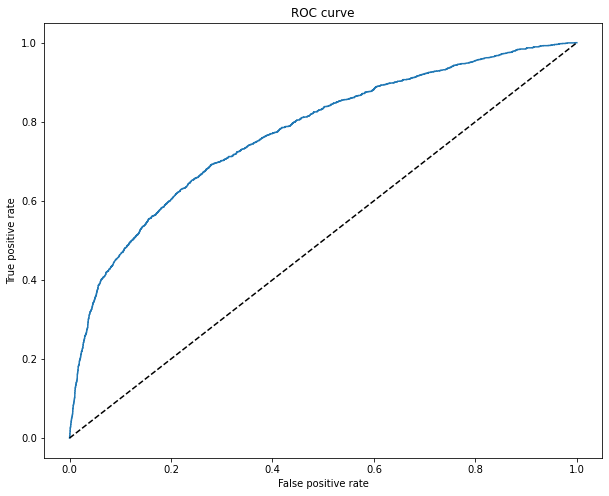

In [27]:
# get the values required to plot a ROC curve
fpr, tpr, thresholds = roc_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot the ROC curve
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr)
# plot a secondary diagonal line, with dashed line style and black color to represent a no-skill classifier
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

In [28]:
# Calculate the Area Under the Receiver Operating Characteristic Curve (AUROC) on our test set
auroc = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
auroc

0.7712918571428573

In [29]:
# calculate Gini from AUROC
gini = auroc * 2 - 1
gini

0.5425837142857146

From the logistic regression summary there are few parameters by which we can determine the best optimum model. Initially all the independent are considered as input variable. From the summary, few independent variables like ‘ PAY_AMT5_woe’,are not adding up values as P values of those variables are greater than 0.05(significance label), So all those variables will be drop in next phase of iteration. Notably this has been seen that accuracy, Precision and recall values are respectively better than other models. All these metrices are calculated considering 0.5 as threshold value. So to get the optimum value I will check accuracy ,precision value with respect to different probability threshold value 


In [30]:
lst=x_train_woe.columns.tolist()

In [31]:
lst_in=['BILL_AMT3_woe',
 #'BILL_AMT5_woe',
 'AGE_woe',
 #'BILL_AMT6_woe',
 'PAY_2_woe',
 'PAY_AMT4_woe',
 #'BILL_AMT4_woe',
 #'EDUCATION_woe',
 'PAY_3_woe',
 'PAY_0_woe',
 'BILL_AMT1_woe',
 'PAY_AMT3_woe',
 #'PAY_AMT5_woe',
 'PAY_6_woe',
 'PAY_4_woe',
 'PAY_5_woe',
 'PAY_AMT1_woe',
 'LIMIT_BAL_woe',
# 'BILL_AMT2_woe',
 'PAY_AMT6_woe',
 'PAY_AMT2_woe']

In [33]:
logit_model=sm.Logit(y_train_woe,x_train_woe[lst_in])
result=logit_model.fit()
print(result.summary2())

lr = LogisticRegression()
lr.fit(x_train_woe[lst_in], y_train_woe)


Optimization terminated successfully.
         Current function value: 0.556409
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.054    
Dependent Variable: target           AIC:              23399.1647
Date:               2023-05-24 02:43 BIC:              23518.4489
No. Observations:   21000            Log-Likelihood:   -11685.   
Df Model:           14               LL-Null:          -11085.   
Df Residuals:       20985            LLR p-value:      1.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
BILL_AMT3_woe     -0.4137   0.2781 -1.4874 0.1369 -0.9589  0.1314
AGE_woe            0.4506   0.1125  4.0067 0.0001  0.2302  0.6710


LogisticRegression()

In [34]:
# make preditions on our test set
y_hat_test = lr.predict(x_test_woe[lst_in])
# get the predicted probabilities
y_hat_test_proba = lr.predict_proba(x_test_woe[lst_in])
# select the probabilities of only the positive class (class 1 - default) 
y_hat_test_proba = y_hat_test_proba[:][: , 1]
# we will now create a new DF with actual classes and the predicted probabilities
# create a temp y_test DF to reset its index to allow proper concaternation with y_hat_test_proba
y_test_temp = y_test_woe.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# check the shape to make sure the number of rows is same as that in y_test
y_test_proba.shape

# Rename the columns
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba']
# Makes the index of one dataframe equal to the index of another dataframe.
y_test_proba.index = x_test_woe.index
y_test_proba.head()

,y_test_class_actual,y_hat_test_proba
10747,0,0.099062
12573,1,0.388568
29676,0,0.126819
8856,1,0.815546
21098,0,0.311760


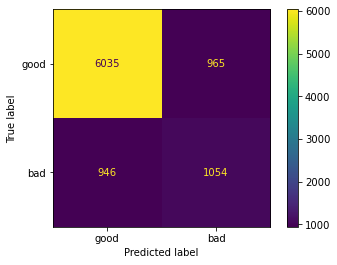

In [35]:
# assign a threshold value to differentiate (base = 50% prob)
tr = 0.26
# crate a new column for the predicted class based on predicted probabilities and threshold
# We will determine this optimal threshold later in this project
y_test_proba['y_test_class_predicted'] = np.where(y_test_proba['y_hat_test_proba'] > tr, 1, 0)
# create the confusion matrix
cm=confusion_matrix(y_test_proba['y_test_class_actual'],
                 y_test_proba['y_test_class_predicted']
                   )
cm
cmd = ConfusionMatrixDisplay(cm, display_labels=['good','bad'])
cmd.plot()

In [36]:
rec=[]
prec=[]
accu=[]
ruc=[]
gi=[]
threshold=[0.10,0.15,0.20,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.40,0.45,0.50]
# assign a threshold value to differentiate (base = 50% prob)

for tr in threshold:
    
    y_test_proba['y_test_class_predicted'] = np.where(y_test_proba['y_hat_test_proba'] > tr, 1, 0)
    cm=confusion_matrix(y_test_proba['y_test_class_actual'],y_test_proba['y_test_class_predicted'])

    recall=cm[1,1]/(cm[1,1]+cm[1,0])
    precision=cm[1,1]/(cm[1,1]+cm[0,1])
    accuracy=(cm[1,1]+cm[0,0])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
    auroc = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_test_class_predicted'])
    gini = auroc * 2 - 1
    rec.append(recall)
    prec.append(precision)
    accu.append(accuracy)
    ruc.append(auroc)
    gi.append(gini)
    
metrix=pd.DataFrame(list(zip(threshold,accu,prec,rec,ruc,gi)),
columns=['threshold','accuracy', 'precision','recall','auroc','gini'])    

In [37]:
metrix

,threshold,accuracy,precision,recall,auroc,gini
0,0.10,0.415667,0.267248,0.9355,0.601321,0.202643
1,0.15,0.654222,0.365245,0.7535,0.689679,0.379357
2,0.20,0.755556,0.461744,0.6035,0.701250,0.402500
3,0.25,0.783667,0.512625,0.5380,0.695929,0.391857
4,0.26,0.787667,0.522041,0.5270,0.694571,0.389143
5,0.27,0.789444,0.526827,0.5155,0.691607,0.383214
6,0.28,0.791889,0.533229,0.5095,0.691036,0.382071
7,0.29,0.794444,0.540279,0.5030,0.690357,0.380714
8,0.30,0.796111,0.545656,0.4930,0.687857,0.375714
9,0.31,0.798778,0.554031,0.4845,0.686536,0.373071


After dropping the variables, the achieved result has been improved. Accuracy , precision, recall auc and gini index has been checked with respect to different threshold. I have applied probability 0.10 to 0.50 and 0.26 came out the optimal for the modelling with accuracy 0.787889, precision 0.522403, recall 0.5305, ruc 0.695964 and gini 0.391929. This is clearly seen that recall value has improved from 0.35 to 0.53 and AUC from 0.64 to 0.69



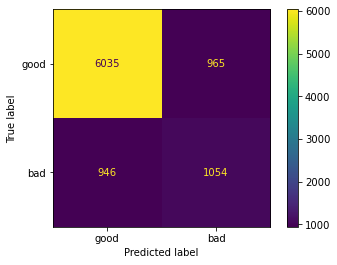

In [39]:
# assign a threshold value to differentiate (base = 50% prob)
tr = 0.26
# crate a new column for the predicted class based on predicted probabilities and threshold
# We will determine this optimal threshold later in this project
y_test_proba['y_test_class_predicted'] = np.where(y_test_proba['y_hat_test_proba'] > tr, 1, 0)
# create the confusion matrix
cm=confusion_matrix(y_test_proba['y_test_class_actual'],
                 y_test_proba['y_test_class_predicted']
                   )
cm
cmd = ConfusionMatrixDisplay(cm, display_labels=['good','bad'])
cmd.plot()
